# Assessment 4

by Napatchol Thaipanich (nt375)

## Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Create a dataframe

In [2]:
df = pd.read_csv("http://raptor.kent.ac.uk/~ds756/Data/kc_house_data_small.csv")

## Task 1 (10 marks)

Create a feature in the dataframe called `unit_price`, that contains price per square foot for each sale. Use the `sqft_living` feature.

In [3]:
df["unit_price"] = df["price"] / df["sqft_living"]
df["unit_price"]

0       188.050847
1       140.243902
2       419.753086
3       589.820359
4       200.534759
           ...    
2608    235.294118
2609    173.160173
2610    394.216667
2611    250.000000
2612    318.627451
Name: unit_price, Length: 2613, dtype: float64

## Task 2 (20 marks)

Create a dataframe that consists of two columns:
- `zipcode`
- `sqf_living`

Each zipcode will have its own row, and the second column will be the mean price of all the sales in said zip code.

In [4]:
avg_price_zipcode_df = df.groupby("zipcode")['unit_price'].mean().reset_index()
avg_price_zipcode_df.columns = ['zipcode', 'avg_unit_price']
avg_price_zipcode_df

,zipcode,avg_unit_price
0,98001,155.791298
1,98002,152.284512
2,98003,158.400200
3,98004,481.385148
4,98005,294.317493
...,...,...
65,98177,288.462758
66,98178,177.014663
67,98188,160.873309
68,98198,180.486717


## Task 3 (20 marks)

Create a dataframe with two columns: 
- `bedrooms`
- `mean_price`. 

Each unique count of bedrooms will have its own row, and the second column will be the mean price for properties with that many bedrooms. 

In [5]:
mean_price_bedrooms_df = df.groupby("bedrooms")['unit_price'].mean().reset_index()
mean_price_bedrooms_df.columns = ['bedrooms','mean_price']
mean_price_bedrooms_df

,bedrooms,mean_price
0,0,152.086444
1,1,401.536056
2,2,342.453922
3,3,262.202315
4,4,233.332738
5,5,232.872054
6,6,225.960185
7,7,272.374072
8,8,210.299380
9,10,180.055402


### Use a bar plot to display the dataframe. Give each bar its own colour. 

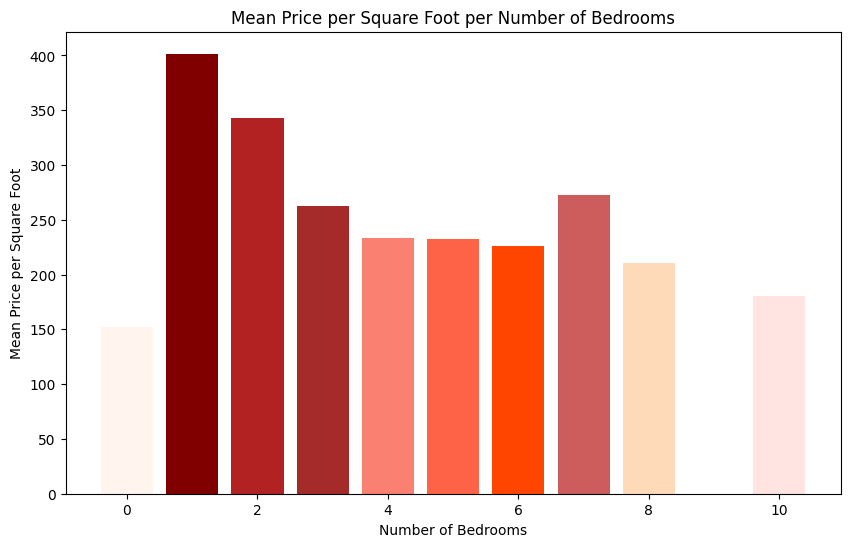

In [6]:
plt.figure(figsize=(10, 6))
plt.bar(mean_price_bedrooms_df["bedrooms"], mean_price_bedrooms_df["mean_price"], color=["seashell", "maroon", "firebrick", "brown", "salmon", "tomato", "orangered", "indianred", "peachpuff", "mistyrose"])
plt.xlabel("Number of Bedrooms")
plt.ylabel("Mean Price per Square Foot")
plt.title("Mean Price per Square Foot per Number of Bedrooms")
plt.show()

## Task 4 (20 marks)

- Graph `long` versus `lat` -> scatter plots
- Colour the waterfront properties red called `Waterfront`, and all others as blue called `Non-Waterfront`.
- Title the plot and label the axis appropriately.
  - xlabel: `Longitude`
  - ylabel: `Latitude`
  - title: 'Waterfront and Non-Waterfront'

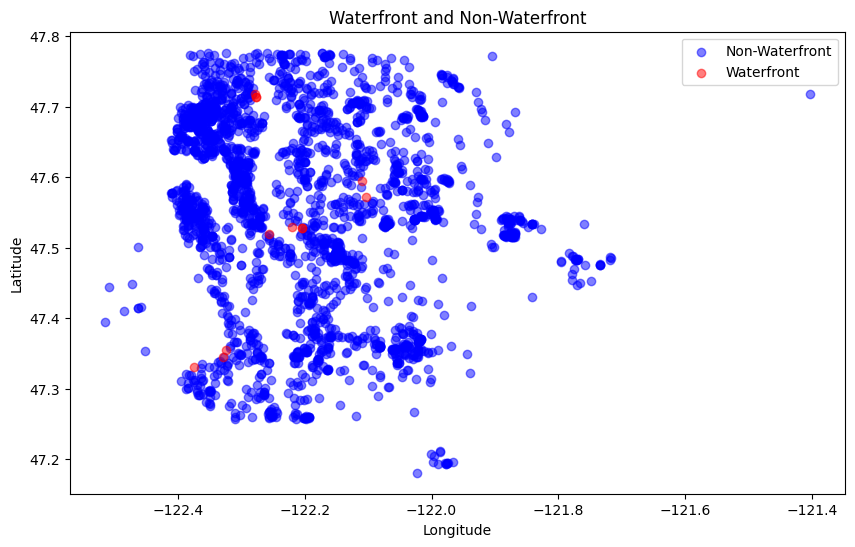

In [7]:
plt.figure(figsize=(10, 6))
waterfront_df = df[df['waterfront'] == 1]
non_waterfront_df = df[df['waterfront'] == 0]

plt.scatter(non_waterfront_df['long'], non_waterfront_df['lat'], color='blue', label='Non-Waterfront', alpha=0.5)
plt.scatter(waterfront_df['long'], waterfront_df['lat'], color='red', label='Waterfront', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Waterfront and Non-Waterfront')
plt.legend()
plt.show()

## Task 5 (30 marks)

- Create a time-series from the dataframe (set the index to the date). 
- Plot the daily mean price. 
- On the same plot, draw (overlay) a line from the smallest daily average to the highest daily average.
- The line should appear on top of the time-series.

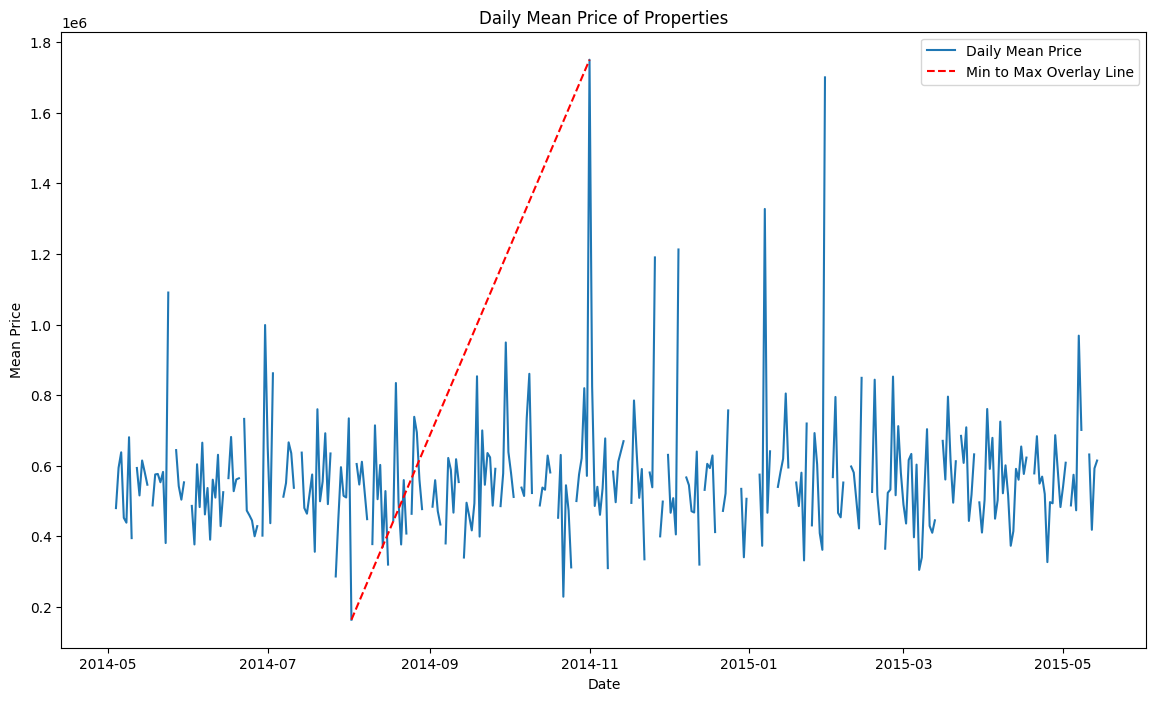

In [8]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Calculate daily mean price
daily_mean_price_df = df.resample('D')['price'].mean()

# Plotting
plt.figure(figsize=(14, 8))
plt.plot(daily_mean_price_df, label='Daily Mean Price')
plt.xlabel('Date')
plt.ylabel('Mean Price')
plt.title('Daily Mean Price of Properties')

# Draw overlay line from smallest to highest daily mean price
plt.plot([daily_mean_price_df.idxmin(), daily_mean_price_df.idxmax()],
         [daily_mean_price_df.min(), daily_mean_price_df.max()],
         color='red', linestyle='--', label='Min to Max Overlay Line')

plt.legend()
plt.show()
